In [4]:
# Assigment 5
# 

# Initialisation of libraries 
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def gnerate_vel_and_ac(exp, var, T, V0, numb):
    arr = np.zeros(numb)
    a = np.random.normal(exp, var ** 0.5, numb)
    arr[0] = V0
    for i in range(1, len(arr)):
        arr[i] = arr[i - 1] + a[i - 1] * T
    return arr, a
def generate_x(T, X0, a, v):
    arr = np.zeros(len(a))
    arr[0] = X0
    for i in range(1, len(a)):
        arr[i] = arr[i - 1] + v[i - 1] * T + a[i - 1] * (T ** 2) / 2
    return arr

def kalman_filt(z, X0, P0, F, Q, R, H):
    arr = np.zeros([200, 2])
    Piin1 = np.zeros([200, 2 , 2])
    Pii = np.zeros([200, 2 , 2])
    K = np.zeros([200, 2])
    arr[0] = X0
    Piin1[0] = P0
    for i in range(1, len(X)):
        arr[i] = np.dot(F, arr[i - 1].reshape(2, 1)).reshape(1, 2)
        Piin1[i] = np.dot(np.dot(F, Piin1[i - 1]), F.transpose()) + Q

        K[i] = (Piin1[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(Piin1[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)

        arr[i] = arr[i] + K[i] * (z[i] - np.dot(H, arr[i]))
        Pii[i] = (np.identity(2) - (K[i].reshape(2,1)).dot(H.reshape(1,2))).dot(Piin1[i])
        
    return arr, Piin1, Pii, K
def kalman_filt_fix_K(z, X0, P0, F, Q, R, H, K_fix):
    arr = np.zeros([200, 2])
    P = np.zeros([200, 2 , 2])
    K = np.zeros([200, 2])
    arr[0] = X0
    P[0] = P0
    for i in range(1, len(X)):
        arr[i] = np.dot(F, arr[i - 1].reshape(2, 1)).reshape(1, 2)
        P[i] = np.dot(np.dot(F, P[i - 1]), F.transpose()) + Q

        K[i] = K_fix
        arr[i] = arr[i] + K[i] * (z[i] - np.dot(H, arr[i]))
        P[i] = (np.identity(2) - (K[i].reshape(2,1)).dot(H.reshape(1,2))).dot(P[i])
        
    return arr, P, K, P[len(P) - 1], K[len(K) - 1]
        
def extrapol(x, m, F):
    arr = np.array(x)
    F_pow = np.linalg.matrix_power(F, m - 1)
    for i in range(len(x) - m + 1):
        arr[i + m - 1] = F_pow.dot(x[i])
    return arr
        

In [17]:
# PART 1
x0 = 5
v0 = 1
T = 1
sigmaa_2 = 0.2 ** 2
numb = 200
v,a = gnerate_vel_and_ac(0, sigmaa_2 ** 0.5, T, v0, numb)
x = generate_x(T, x0, a, v)

In [18]:
# PART 2
sigmaeta_2 = 20 ** 2
eta = np.random.normal(0, sigmaeta_2 ** 0.5, 200)
z = x + eta

In [19]:
# PART 3
F = np.array([[1, T], [0, 1]])
G = np.array([T ** 2 / 2, T])
H = np.array([1, 0])

In [20]:
X = np.zeros([200, 2])
X[0] = np.array([x[0], v[0]])
for i in range(1, len(X)):
    X[i] = np.dot(F, X[i - 1]) + np.dot(G, a[i - 1])

In [21]:
for i in range(len(x)):
    z[i] = np.dot(H, X[i]) + eta[i]

In [23]:
# PART 4
Q = np.dot(np.dot(G, G.transpose()), sigmaa_2)
R = sigmaeta_2
X0 = np.array([2, 0])
P0 = np.array([[10000, 0], [0, 10000]])

X_filt, Piin1, Pii, K = kalman_filt(z, X0, P0, F, Q, R, H)

/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_35181/590599072.py:26: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (Piin1[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(Piin1[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)


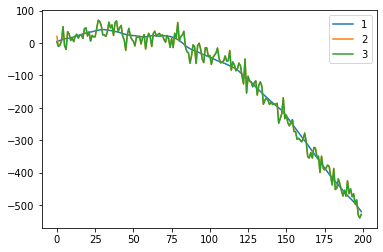

In [24]:
# PART 5
plt.plot(X[:,0])
plt.plot(z)
plt.plot(X_filt[:,0])
plt.legend(["1", "2", "3", "4"])

/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_90988/969455598.py:24: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)
/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_90988/969455598.py:24: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)
/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_90988/969455598.py:24: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)


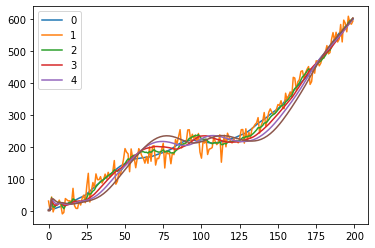

In [10]:
plt.plot(X[:, 0])
plt.plot(z)
plt.plot(X_filt[:,0])
plt.plot(kalman_filt(X_filt[:,0], X0, P0, F, Q, R, H)[0][:,0])
plt.plot(kalman_filt(kalman_filt(X_filt[:,0], X0, P0, F, Q, R, H)[0][:,0], X0, P0, F, Q, R, H)[0][:,0])
plt.plot(kalman_filt(kalman_filt(kalman_filt(X_filt[:,0], X0, P0, F, Q, R, H)[0][:,0], X0, P0, F, Q, R, H)[0][:,0], X0, P0, F, Q, R, H)[0][:,0])
plt.legend(["0", "1", "2", "3", "4"])

Gain stable =  0.13895150652807645
Standard deviation of estimation error stable =  7.455239943236608


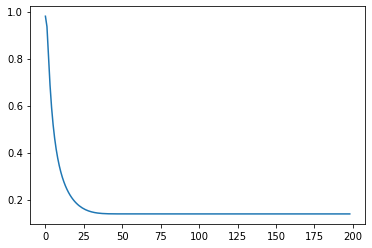

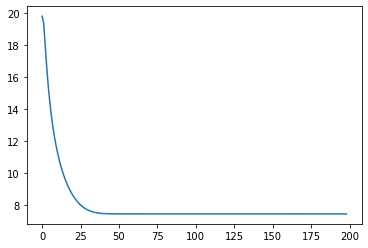

In [45]:
# PART 6
print("Gain stable =", K[125, 0])
print("Standard deviation of estimation error stable =", P[125, 0, 0] ** 0.5)
plt.plot(K[1:, 0])
plt.show()
plt.plot(P[1:, 0, 0] ** 0.5)

In [12]:
# PART 7 function extrapol added
m = 7
X_extrapol = extrapol(X_filt, m, F)

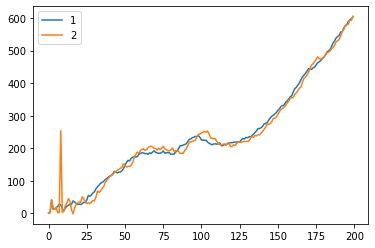

In [13]:
plt.plot(X_filt[:, 0])
plt.plot(X_extrapol[:, 0])
plt.legend(["1", "2"])

In [14]:
# Part 8
err1 = np.zeros([500, 197])
err2 = np.zeros([500, 197])
P0 = np.array([[10000, 0], [0, 10000]])
P_res1 = np.zeros([500, 2, 2])
xf = np.zeros([200, 2])
kal_filt = kalman_filt(z, X0, P0, F, Q, R, H)
xf = kal_filt[0]
P_res1[0] = kal_filt[3]
for i in range(500):
    kal_filt = kalman_filt(xf[:, 0], X0, P0, F, Q, R, H)
    xf = kal_filt[0]
    P_res1[i] = kal_filt[3]
    X_extrapol = extrapol(xf, m, F)
    err1[i] = (X[3:, 0] - xf[3:, 0]) ** 2
    err2[i] = (X[3:, 0] - X_extrapol[3:, 0]) ** 2
final_err11 = np.zeros(500)
final_err12 = np.zeros(500)
for i in range(500):
    final_err11[i] = np.sqrt(np.mean(err1[i]))
    final_err12[i] = np.sqrt(np.mean(err2[i]))

/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_90988/969455598.py:24: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)


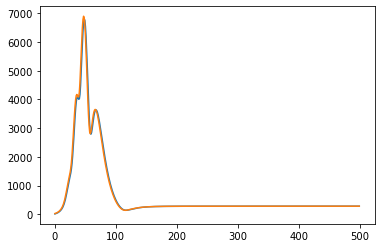

In [15]:
plt.plot(final_err11)
plt.plot(final_err12)

In [16]:
# Part 9
print("Standard deviation of measurement errors =", np.std(x - z))
print("Mean-squared error of filtered estimate =", final_err11[0])

Standard deviation of measurement errors =  21.272848478743345
Mean-squared error of filtered estimate =  15.617364053426535


In [53]:
# Part 10
err1 = np.zeros([500, 197])
err2 = np.zeros([500, 197])
P0 = np.array([[100, 0], [0, 100]])
# X0 = np.array([2, 0])
P_res2 = np.zeros([500, 2, 2])
xf = np.zeros([200, 2])
kal_filt = kalman_filt(z, X0, P0, F, Q, R, H)
xf = kal_filt[0]
P_res2[0] = kal_filt[3]
for i in range(500):
    kal_filt = kalman_filt(xf[:, 0], X0, P0, F, Q, R, H)
    xf = kal_filt[0]
    P_res2[i] = kal_filt[3]
    X_extrapol = extrapol(xf, m, F)
    err1[i] = (X[3:, 0] - xf[3:, 0]) ** 2
    err2[i] = (X[3:, 0] - X_extrapol[3:, 0]) ** 2
final_err21 = np.zeros(500)
final_err22 = np.zeros(500)
for i in range(500):
    final_err21[i] = np.sqrt(np.mean(err1[i]))
    final_err22[i] = np.sqrt(np.mean(err2[i]))

/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_90988/969455598.py:24: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)


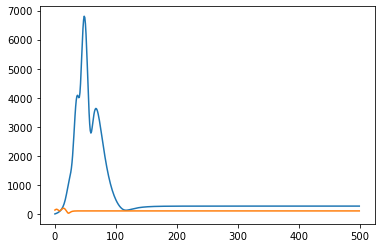

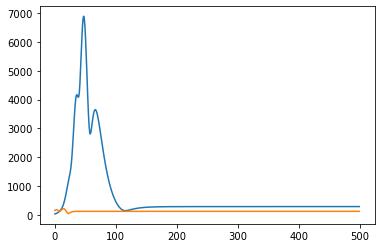

In [54]:
plt.plot(final_err11)
plt.plot(final_err21)
plt.show()
plt.plot(final_err12)
plt.plot(final_err22)

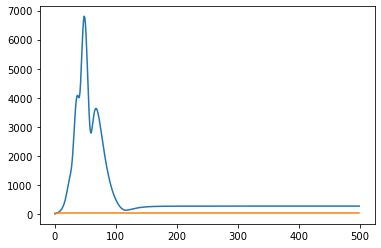

In [55]:
# Part 11
plt.plot(final_err11)
plt.plot(P_res1[:, 0, 0])

In [94]:
# Part 12
err1 = np.zeros([500, 197])
err2 = np.zeros([500, 197])
sigmaa_2 = 0
v,a = gnerate_vel_and_ac(0, sigmaa_2 ** 0.5, T, v0, numb)
x = generate_x(T, x0, a, v)
Q = np.dot(np.dot(G, G.transpose()), sigmaa_2)
P0 = np.array([[0, 0], [0, 0]])
X = np.zeros([200, 2])
X[0] = np.array([x[0], v[0]])
for i in range(1, len(X)):
    X[i] = np.dot(F, X[i - 1]) + np.dot(G, a[i - 1])
P_res = np.zeros([500, 2, 2])
K_res = np.zeros([500, 2])
kal_filt = kalman_filt(x, X[0], P0, F, Q, R, H)
xf = kal_filt[0]
P_res[0] = kal_filt[3]
K_res[0] = kal_filt[4]
for i in range(500):
    kal_filt = kalman_filt(xf, X[0], P0, F, Q, R, H)
    xf = kal_filt[0]
    P_res[i] = kal_filt[3]
    K_res[i] = kal_filt[4]
    X_extrapol = extrapol(xf, m, F)
    err1[i] = (xf[3:, 0] - x[3:]) ** 2
    err2[i] = (x[3:] - X_extrapol[3:, 0]) ** 2
final_err31 = np.zeros(500)
final_err32 = np.zeros(500)
for i in range(500):
    final_err31[i] = np.sqrt(np.mean(err1[i]))
    final_err32[i] = np.sqrt(np.mean(err2[i]))

/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_90988/969455598.py:24: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)


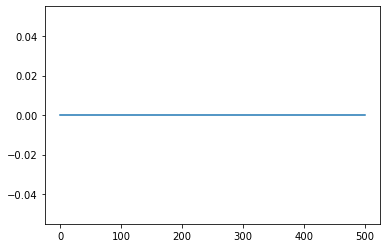

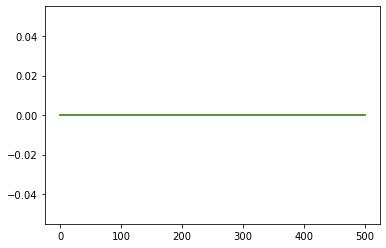

In [96]:
plt.plot(K_res[:, 0])
plt.show()
plt.plot(P_res[:, 0, 0] ** 0.5)
plt.plot(final_err31)
plt.plot(final_err32)

In [99]:
# Part 13
err1 = np.zeros([500, 197])
err2 = np.zeros([500, 197])
sigmaa_2 = 0.2 ** 2
v,a = gnerate_vel_and_ac(0, sigmaa_2 ** 0.5, T, v0, numb)
x = generate_x(T, x0, a, v)
Q = 0
P0 = np.array([[10000, 0], [0, 10000]])
X = np.zeros([200, 2])
X[0] = np.array([x[0], v[0]])

P_res = np.zeros([500, 2, 2])
K_res = np.zeros([500, 2])
kal_filt = kalman_filt(x, X[0], P0, F, Q, R, H)
xf = kal_filt[0]
P_res[0] = kal_filt[3]
K_res[0] = kal_filt[4]
for i in range(500):
    kal_filt = kalman_filt(xf, X[0], P0, F, Q, R, H)
    xf = kal_filt[0]
    P_res[i] = kal_filt[3]
    K_res[i] = kal_filt[4]
    X_extrapol = extrapol(xf, m, F)
    err1[i] = (xf[3:, 0] - x[3:]) ** 2
    err2[i] = (x[3:] - X_extrapol[3:, 0]) ** 2
final_err41 = np.zeros(500)
final_err42 = np.zeros(500)
for i in range(500):
    final_err41[i] = np.sqrt(np.mean(err1[i]))
    final_err42[i] = np.sqrt(np.mean(err2[i]))

/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_90988/969455598.py:24: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)


Calculation errors of estimation = 2.824585690243437
True estimation errors = 0.2


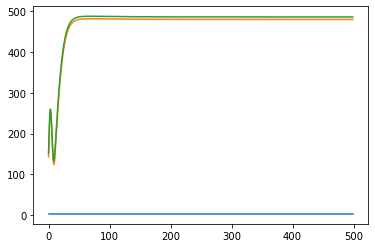

In [100]:
plt.plot(P_res[:, 0, 0] ** 0.5)
plt.plot(final_err41)
plt.plot(final_err42)
print("Calculation errors of estimation =", P_res[0, 0, 0] ** 0.5)
print("True estimation errors =", sigmaa_2 ** 0.5)

In [101]:
# Part 14
sigmaa1_2 = 0.2 ** 2
v1,a1 = gnerate_vel_and_ac(0, sigmaa1_2 ** 0.5, T, v0, numb)
x1 = generate_x(T, x0, a1, v1)

sigmaa2_2 = 1 ** 2
v2,a2 = gnerate_vel_and_ac(0, sigmaa2_2 ** 0.5, T, v0, numb)
x2 = generate_x(T, x0, a2, v2)

X0 = np.array([5, 1])

Q1 = np.dot(np.dot(G, G.transpose()), sigmaa1_2)
Q2 = np.dot(np.dot(G, G.transpose()), sigmaa2_2)

eta = np.random.normal(0, sigmaeta_2 ** 0.5, 200)
z1 = x1 + eta
z2 = x2 + eta

X_filt1, P1, K1 = kalman_filt(z1, X0, P0, F, Q1, R, H)[:3]
X_filt2, P2, K2 = kalman_filt(z2, X0, P0, F, Q2, R, H)[:3]

/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_90988/969455598.py:24: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)


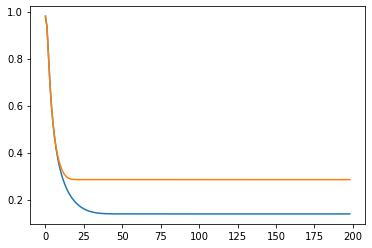

In [102]:
plt.plot(K1[1:,0])
plt.plot(K2[1:,0])

In [110]:
# Part 15
sigmaa_2 = 0.2 ** 2
v,a = gnerate_vel_and_ac(0, sigmaa1_2 ** 0.5, T, v0, numb)
x = generate_x(T, x0, a1, v1)
Q = np.dot(np.dot(G, G.transpose()), sigmaa_2)

X0 = np.array([100, 5])
P0 = np.array([[100, 0], [0, 100]])

xf = np.zeros([200, 2])
kal_filt = kalman_filt(x, X0, P0, F, Q, R, H)
K = kal_filt[2]
xf = kal_filt[0]
P_res[0] = kal_filt[3]
K_res[0] = kal_filt[4]
for i in range(500):
    kal_filt = kalman_filt(xf[:, 0], X0, P0, F, Q, R, H)
    xf = kal_filt[0]
    P_res[i] = kal_filt[3]
    K_res[i] = kal_filt[4]
    X_extrapol = extrapol(xf, m, F)
    err1[i] = (X[3:, 0] - xf[3:, 0]) ** 2
    err2[i] = (X[3:, 0] - X_extrapol[3:, 0]) ** 2
final_err51 = np.zeros(500)
final_err52 = np.zeros(500)
for i in range(500):
    final_err51[i] = np.sqrt(np.mean(err1[i]))
    final_err52[i] = np.sqrt(np.mean(err2[i]))

/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_90988/969455598.py:24: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)


Gain stable = 0.1389515046281197


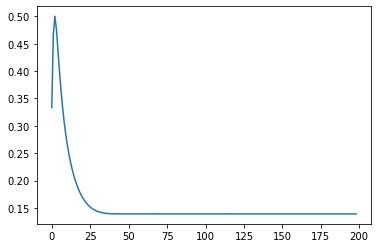

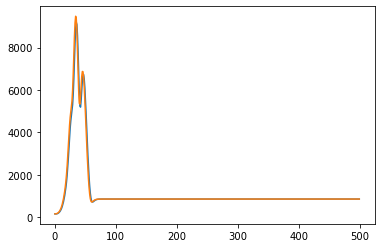

In [118]:
print("Gain stable =", K[125, 0])
K_fix = K[125, 0] / 5
plt.plot(K[1:, 0])
plt.show()
plt.plot(final_err51)
plt.plot(final_err52)

In [119]:
sigmaa_2 = 0.2 ** 2
v,a = gnerate_vel_and_ac(0, sigmaa1_2 ** 0.5, T, v0, numb)
x = generate_x(T, x0, a1, v1)
Q = np.dot(np.dot(G, G.transpose()), sigmaa_2)

X0 = np.array([100, 5])
P0 = np.array([[100, 0], [0, 100]])

xf = np.zeros([200, 2])
kal_filt = kalman_filt_fix_K(x, X0, P0, F, Q, R, H, K_fix)
xf = kal_filt[0]
P_res[0] = kal_filt[3]
K_res[0] = kal_filt[4]
for i in range(500):
    kal_filt = kalman_filt_fix_K(xf[:, 0], X0, P0, F, Q, R, H, K_fix)
    xf = kal_filt[0]
    P_res[i] = kal_filt[3]
    K_res[i] = kal_filt[4]
    X_extrapol = extrapol(xf, m, F)
    err1[i] = (X[3:, 0] - xf[3:, 0]) ** 2
    err2[i] = (X[3:, 0] - X_extrapol[3:, 0]) ** 2
final_err61 = np.zeros(500)
final_err62 = np.zeros(500)
for i in range(500):
    final_err61[i] = np.sqrt(np.mean(err1[i]))
    final_err62[i] = np.sqrt(np.mean(err2[i]))

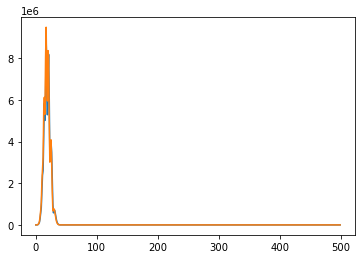

In [122]:
plt.plot(final_err61)
plt.plot(final_err62)